# Recruitment task for OLX internship at metadata team

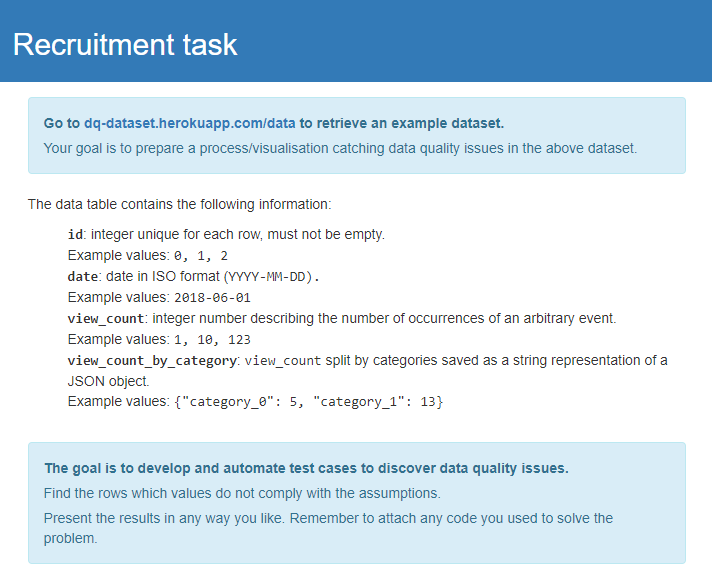

In [1]:
from IPython.display import Image
Image('https://image.ibb.co/fm4QvT/image.png', width=600, height=600)

### Importing all of the dependencies used throughout the project as well as environment variables

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="white")
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

### Reading data from json file, available under the [link](http://dq-dataset.herokuapp.com/data)

In [3]:
data = pd.read_json("http://dq-dataset.herokuapp.com/data")

### Previewing data

In [4]:
print(data.columns)

Index(['date', 'id', 'view_count', 'view_count_by_category'], dtype='object')


In [5]:
print(data.dtypes)

date                      object 
id                        float64
view_count                int64  
view_count_by_category    object 
dtype: object


In [6]:
print(data.shape)

(100, 4)


In [7]:
print(data.describe())

              id  view_count
count  99.000000  100.000000
mean   48.595960  245.200000
std    28.858882  77.556887 
min    0.000000  -294.000000
25%    23.500000  216.750000
50%    48.000000  246.500000
75%    73.500000  285.250000
max    99.000000  447.000000


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
date                      100 non-null object
id                        99 non-null float64
view_count                100 non-null int64
view_count_by_category    100 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB
None


### At this point indexes only complicate some operations; they'll be readded further

In [9]:
data.drop('id', axis=1, inplace=True)

### As we can observe in a cell below, some of the dates use different formats; therefore, we need to handle them accordingly

In [10]:
data.date.values

array(['2008-12-21', '2013-01-06', '2003-08-30', '2004-07-28',
       '2010-08-04', '2012-11-02', '2012-05-24', '2001-06-29',
       '2017-02-17', '31-March-05', '2009-12-13', '2008-03-10',
       '2004-10-08', '2008-02-23', '2005-08-09', '2000-03-30',
       '2007-08-25', '2011-02-05', '2004-04-03', '2013-08-14',
       '2011-06-15', '2007-12-14', '2009-11-26', '2008-08-26',
       '2013-05-01', '2004-01-29', '04-January-00', '2017-02-06',
       '2003-10-26', '2010-09-19', '2007-07-14', '25-August-08',
       '2006-12-18', '2008-06-22', '2017-08-15', '2013-12-20',
       '2015-09-29', '2000-03-05', '2014-02-10', '2006-05-06',
       '2015-07-31', '07-April-07', '2003-01-28', '2000-02-14',
       '2010-01-02', '2003-11-11', '2000-07-17', '2017-06-14',
       '2002-08-19', '2002-03-01', '2009-02-14', '2001-12-30',
       '9999-01-01', '2009-02-24', '2013-07-10', '2005-09-14',
       '2010-08-22', '2004-08-11', '2001-02-20', '2009-09-05',
       '2005-04-02', '2002-10-19', '2002-01-18',

### Additionaly - there's a date '9999' - it'll be dropped

In [11]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('9999-01-01', '9999')

In [12]:
# regex?
temp = []
for x in data.date:
    if x[2] == '-' and x[3] >= 'A' and x[3] <= 'Z':
        print('date bofore: ' + x)
        date = datetime.strptime(x, "%d-%B-%y").strftime("%Y-%m-%d")
        temp.append(date)
        print('data after: ' + date + '\n')
    else:
        temp.append(x)

date bofore: 31-March-05
data after: 2005-03-31

date bofore: 04-January-00
data after: 2000-01-04

date bofore: 25-August-08
data after: 2008-08-25

date bofore: 07-April-07
data after: 2007-04-07



In [13]:
temp = pd.DataFrame(temp)
data.drop('date', axis=1, inplace=True)
data = pd.concat([temp, data], axis=1)
data.rename(columns={0: 'date'}, inplace=True)

### Preview of the dataset after manipulating it in previous steps

In [14]:
data.head(2)

,date,view_count,view_count_by_category
0,2008-12-21,243,"{""category_0"": 45, ""category_1"": 22, ""category_2"": 61, ""category_3"": 44, ""category_4"": 71}"
1,2013-01-06,259,"{""category_0"": 50, ""category_1"": 12, ""category_2"": 70, ""category_3"": 47, ""category_4"": 80}"


### Now, that all the dates have been formatted back into desired ISO format (YYYY-MM-DD), there comes time to split dictionary-like strings from *view_count_by_category* column into according columns

In [15]:
data.view_count_by_category[0]

'{"category_0": 45, "category_1": 22, "category_2": 61, "category_3": 44, "category_4": 71}'

In [16]:
cols_to_split = data.view_count_by_category

In [17]:
col0 = []
col1 = []
col2 = []
col3 = []
col4 = []

for x in cols_to_split:
    x = x.replace("'", "\"")
    x = x.replace("  ", ", ")
    if(not x.endswith('}')):
        x += "}"
    wolaj_dzejsona = json.loads(x)
    col0.append(wolaj_dzejsona['category_0'])
    col1.append(wolaj_dzejsona['category_1'])
    col2.append(wolaj_dzejsona['category_2'])
    col3.append(wolaj_dzejsona['category_3'])
    col4.append(wolaj_dzejsona['category_4'])

### Concatenating two panda's DataFrames together

In [18]:
view_count_by_category = pd.DataFrame([col0, col1, col2, col3, col4]).T
view_count_by_category.columns = ['category_0_count', 'category_1_count', 'category_2_count', 'category_3_count', 'category_4_count']
data = pd.concat([data, view_count_by_category], axis=1)

### Some of the values from *view_count* column differ from the values obtained from the *view_count_by_category* column; I anticipated the sum of newly created columns are the correct ones

In [19]:
data['suma'] = data['category_0_count'] + data['category_1_count'] + data['category_2_count'] + data['category_3_count'] + data['category_4_count']

In [20]:
compare = np.where(data.suma != data.view_count)
print(compare[-1])

[ 8 11 29 61]


### Comparing and swapping the sums (wrong one and the correct one) in the for-loop

In [21]:
for i in compare[-1]:
    print('element: ', i)
    print('pre: ', data.view_count[i])
    data.view_count[i] = data.suma[i]
    print('post: ', data.view_count[i])
    print('\n')

element:  8
pre:  192
post:  183


element:  11
pre:  311
post:  302


element:  29
pre:  -294
post:  294


element:  61
pre:  231
post:  221




C:\Users\albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Getting rid of *view_count_by_category* and *suma* columns, since they're not useful anymore

In [24]:
data.drop(['view_count_by_category', 'suma'], axis=1, inplace=True)

### Preview of the data after all the transformations did so far

In [25]:
data.head(2)

,date,view_count,category_0_count,category_1_count,category_2_count,category_3_count,category_4_count
0,2008-12-21,243,45,22,61,44,71
1,2013-01-06,259,50,12,70,47,80


### Getting rid of the row, containing '9999' date, mentioned before

In [28]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('2018-05-05', '2018')

In [29]:
for i, x in enumerate(data.date):
    if int(x[:4]) >= 9000:
        data.drop(data.index[i], inplace=True)
        print('now')

In [30]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('2018-05-05', '2018')

## Preparing the correlation matrix; range - [-1; 1]; the lower the value, the less correlated the corresponding values are; analogical rules apply to positive values

In [31]:
corr = data.corr()
corr.view_count.drop('view_count', axis=0, inplace=True)
corr.category_0_count.drop('category_0_count', axis=0, inplace=True)
corr.category_1_count.drop('category_1_count', axis=0, inplace=True)
corr.category_2_count.drop('category_2_count', axis=0, inplace=True)
corr.category_3_count.drop('category_3_count', axis=0, inplace=True)
corr.category_4_count.drop('category_4_count', axis=0, inplace=True)

### Visualizing correlations between different features of the dataset, using heatmap

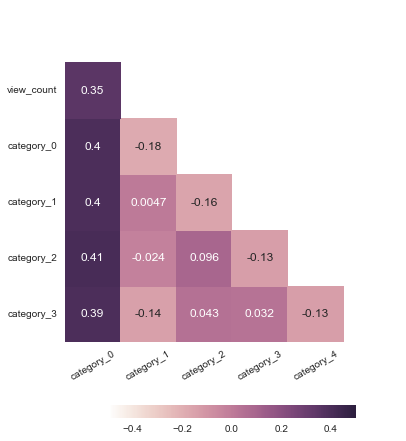

In [32]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 9))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.45, vmax=.5,
            square=True, annot=True, cbar_kws={"shrink": 0.74, "orientation": "horizontal", "pad": 0.13})
labels = ['category_0', 'category_1', 'category_2', 'category_3', 'category_4']
rev_labels = ['category_3', 'category_2', 'category_1', 'category_0', 'view_count']
g.set_xticklabels(labels=labels, rotation=30, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'top'})
g.set_yticklabels(labels=rev_labels , rotation=0, fontdict={'horizontalalignment': 'right', 'verticalalignment': 'center'})
plt.show()

## Credits
Albert Millert: [devmood](https://github.com/devmood)

---
MIT Licence